In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

from shapely.geometry import box

import rioxarray as rx

import os
import glob
import json
import getpass
from zipfile import ZipFile

import sentinelsat as sat
from sentinelsat import SentinelAPI, make_path_filter

In [2]:
mille_lacs = rx.open_rasterio('../data/mille_lacs.tiff', masked=True)
mille_lacs

<xarray.DataArray (band: 1, y: 5740, x: 5586)>
[32063640 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.365e+05 4.365e+05 ... 4.644e+05 4.644e+05
  * y            (y) float64 5.135e+06 5.135e+06 ... 5.106e+06 5.106e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

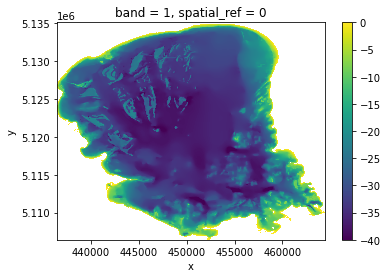

In [3]:
mille_lacs.plot()

In [4]:
minx, miny, maxx, maxy = mille_lacs.rio.bounds()
bounding_poly = box(minx, miny, maxx, maxy)
bounding_series = gpd.GeoSeries([bounding_poly], crs=mille_lacs.rio.crs)
bounding_series

0    POLYGON ((464413.103 5106408.154, 464413.103 5...
dtype: geometry

In [5]:
bounding_poly.bounds, bounding_poly.buffer(5).bounds

((436481.4788999969, 5106408.1538999975, 464413.1029999998, 5135108.035399999),
 (436476.4788999969, 5106403.1538999975, 464418.1029999998, 5135113.035399999))

In [14]:
copernicus_user = getpass.getpass("Enter your Copernicus username: ")

In [15]:
copernicus_pw = getpass.getpass("Enter your Copernicus password: ")

In [20]:
api = SentinelAPI(copernicus_user, copernicus_pw, 'https://scihub.copernicus.eu/dhus')
# api = SentinelAPI(copernicus_user, copernicus_pw, 'https://data.sentinel.zamg.ac.at/dhus')

In [21]:
footprint = sat.geojson_to_wkt(json.loads(bounding_series.to_crs(epsg=4326).to_json()))
footprint

'GEOMETRYCOLLECTION(POLYGON((-93.4605 46.1103,-93.4627 46.3686,-93.8258 46.3666,-93.8219 46.1083,-93.4605 46.1103)))'

In [24]:
from_date = '20210501'
to_date = '20211201'
products = api.query(footprint,
                     date=(from_date, to_date),
                     platformname='Sentinel-2',
                     processinglevel='Level-1C',
                     cloudcoverpercentage=(0, 20))
areas = api.to_geodataframe(products)
areas.head()

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5,S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-11-25T17:16:41.024Z, Instrument: MS...",false,2021-11-25 17:16:41.024,2021-11-25 19:13:13,2021-11-25 17:16:41.024,2021-11-25 17:16:41.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS2_20211125T191313_S2021...,S2A_OPER_MSI_L1C_TL_VGS2_20211125T191313_A0335...,S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_2...,0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5,"MULTIPOLYGON (((-94.29099 45.95826, -92.87402 ..."
2e1a722a-ed71-4ac0-a36c-bf8bed7c75cc,S2B_MSIL1C_20211120T171619_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-11-20T17:16:19.024Z, Instrument: MS...",false,2021-11-20 17:16:19.024,2021-11-20 19:22:46,2021-11-20 17:16:19.024,2021-11-20 17:16:19.024,...,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_VGS1_20211120T192246_S2021...,S2B_OPER_MSI_L1C_TL_VGS1_20211120T192246_A0245...,S2B_MSIL1C_20211120T171619_N0301_R112_T15TVM_2...,2e1a722a-ed71-4ac0-a36c-bf8bed7c75cc,"MULTIPOLYGON (((-94.29099 45.95826, -92.87402 ..."
51e2b7ad-08c2-4b47-9d8f-745bdd12ecba,S2A_MSIL1C_20211016T171311_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-16T17:13:11.024Z, Instrument: MS...",false,2021-10-16 17:13:11.024,2021-10-16 19:18:15,2021-10-16 17:13:11.024,2021-10-16 17:13:11.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS1_20211016T191815_S2021...,S2A_OPER_MSI_L1C_TL_VGS1_20211016T191815_A0329...,S2A_MSIL1C_20211016T171311_N0301_R112_T15TVM_2...,51e2b7ad-08c2-4b47-9d8f-745bdd12ecba,"MULTIPOLYGON (((-94.29099 45.95826, -92.87402 ..."
1c3c518d-b4e8-4f81-9e13-299139ef8663,S2A_MSIL1C_20210916T170941_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-09-16T17:09:41.024Z, Instrument: MS...",false,2021-09-16 17:09:41.024,2021-09-16 21:03:02,2021-09-16 17:09:41.024,2021-09-16 17:09:41.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS1_20210916T210302_S2021...,S2A_OPER_MSI_L1C_TL_VGS1_20210916T210302_A0325...,S2A_MSIL1C_20210916T170941_N0301_R112_T15TVM_2...,1c3c518d-b4e8-4f81-9e13-299139ef8663,"MULTIPOLYGON (((-94.29099 45.95826, -92.87402 ..."
b67c0940-0cc5-49d2-aa71-ff8e25bfd835,S2A_MSIL1C_20210906T170851_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-09-06T17:08:51.024Z, Instrument: MS...",false,2021-09-06 17:08:51.024,2021-09-06 21:07:56,2021-09-06 17:08:51.024,2021-09-06 17:08:51.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS1_20210906T210756_S2021...,S2A_OPER_MSI_L1C_TL_VGS1_20210906T210756_A0324...,S2A_MSIL1C_20210906T170851_N0301_R112_T15TVM_2...,b67c0940-0cc5-49d2-aa71-ff8e25bfd835,"MULTIPOLYGON (((-94.29099 45.95826, -92.87402 ..."


<AxesSubplot:>

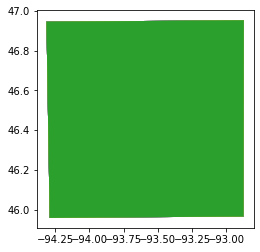

In [25]:
areas.plot(column='uuid', cmap=None)

In [26]:
areas.sort_values(by='cloudcoverpercentage', ascending=False)[["title", "link", "cloudcoverpercentage", "generationdate", "ondemand"]]

,title,link,cloudcoverpercentage,generationdate,ondemand
387dfb63-ca29-42c2-a78a-8f06908c6495,S2B_MSIL1C_20210713T170849_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,17.0745,2021-07-13 20:23:33,false
2e1a722a-ed71-4ac0-a36c-bf8bed7c75cc,S2B_MSIL1C_20211120T171619_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,15.0709,2021-11-20 19:22:46,false
1ef2892c-9e4a-44b6-a3cc-c5b7b4554c52,S2B_MSIL1C_20210623T170849_N0300_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,11.6900,2021-06-23 20:33:01,false
0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5,S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,9.8926,2021-11-25 19:13:13,false
2dd26b46-39c2-498a-a4b2-4affa5afe8a7,S2A_MSIL1C_20210529T170851_N0300_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,6.0687,2021-05-29 21:17:03,false
e67a935b-4376-47fc-84bf-911022ef4631,S2B_MSIL1C_20210901T170849_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,5.6508,2021-09-01 20:39:26,false
d7486b49-f88d-440e-ac5a-c7cb838ac2a1,S2B_MSIL1C_20210613T170849_N0300_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,3.3613,2021-06-13 20:28:10,false
92f70282-a852-444e-9937-5439fcb186d3,S2A_MSIL1C_20210817T170851_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,2.9001,2021-08-17 20:51:45,false
fd72cdb7-6fca-4299-b8d3-acc381c6627b,S2A_MSIL1C_20210718T170851_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,1.0982,2021-07-18 20:55:09,false
7cc86b57-a998-4380-ae2e-43d76cd7caaf,S2B_MSIL1C_20210822T170849_N0301_R112_T15TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,0.2097,2021-08-22 20:25:46,false


In [27]:
api.get_product_odata(areas.index.values[0])

{'id': '0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5',
 'title': 'S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_20211125T191313',
 'size': 848635510,
 'md5': 'ba5c5f20d2f4d75586408652a48ccbcd',
 'date': datetime.datetime(2021, 11, 25, 17, 16, 41, 24000),
 'footprint': 'POLYGON((-94.314575 46.946162221065514,-92.871735 46.95363733424615,-92.87402 45.96548172662488,-94.290985 45.958258688896564,-94.314575 46.946162221065514))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 11, 25, 20, 43, 5, 10000),
 'Ingestion Date': datetime.datetime(2021, 11, 25, 20, 42, 33, 512000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5')/Products('Quicklook')/$value"}

In [28]:
# nodefilter = make_path_filter("*.jp2")
# product_info = api.download(areas.index.values[0], directory_path='../data/sentinel/', nodefilter=nodefilter)
product_info = api.download(areas.index.values[0], directory_path='../data/sentinel/')
product_info

{'id': '0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5',
 'title': 'S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_20211125T191313',
 'size': 848635510,
 'md5': 'ba5c5f20d2f4d75586408652a48ccbcd',
 'date': datetime.datetime(2021, 11, 25, 17, 16, 41, 24000),
 'footprint': 'POLYGON((-94.314575 46.946162221065514,-92.871735 46.95363733424615,-92.87402 45.96548172662488,-94.290985 45.958258688896564,-94.314575 46.946162221065514))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 11, 25, 20, 43, 5, 10000),
 'Ingestion Date': datetime.datetime(2021, 11, 25, 20, 42, 33, 512000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('0b5a1258-d40e-4d7d-8518-3b2e7d88c8e5')/Products('Quicklook')/$value",
 'path': '..\\data\\sentinel\\S2A_MSIL1C_20211125T171641_N0301_R112_T15TVM_20211125T191313.zip',
 'downloaded_bytes': 848635510}

In [44]:
product_infos = []
for product in areas.index.values[1:]:
    if api.is_online(product):
        try:
            pinfo = api.download(product, directory_path='../data/sentinel/')
            product_infos.append(pinfo)
        except Error as e:
            print(f"{product} is not available")
            print(e)

In [19]:
sentinel_archives_root = '../data/sentinel'
sentinel_archives_pattern = f'{sentinel_archives_root}/*.SAFE'
sentinel_archives = glob.glob(sentinel_archives_pattern)

zipped_sentinel_archives_pattern = f'{sentinel_archives_root}/*.zip'
zipped_sentinel_archives = glob.glob(zipped_sentinel_archives_pattern)

safe_products = set([os.path.basename(arch).split('.')[0] for arch in sentinel_archives])
zipped_products = set([os.path.basename(arch).split('.')[0] for arch in zipped_sentinel_archives])
products_to_unzip = zipped_products - safe_products

paths_to_unzip = [arch_path for arch_path in zipped_sentinel_archives if os.path.basename(arch_path).split('.')[0] in products_to_unzip]
paths_to_unzip

['../data/sentinel\\S2A_MSIL1C_20210916T170941_N0301_R112_T15TVM_20210916T210302.zip',
 '../data/sentinel\\S2A_MSIL1C_20211016T171311_N0301_R112_T15TVM_20211016T191815.zip',
 '../data/sentinel\\S2B_MSIL1C_20211120T171619_N0301_R112_T15TVM_20211120T192246.zip']

In [20]:
for path_to_unzip in paths_to_unzip:
    with ZipFile(path_to_unzip) as zip:
        zip.extractall(path="../data/sentinel/")